In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Dirichlet prior

The support of the [Dirichlet distribution](https://en.wikipedia.org/wiki/Dirichlet_distribution) is the set of $K$-dimensional vectors $\theta$ whose entries are real numbers in the interval $(0,1)$, furthermore, $||\theta||_1 = 1$ (the sum of the coordinates is 1). These vectors can be viewed as the probabilities of a $K$-way categorical event.

The density is parameterised by $K$ strictly positive real values called *concentration parameters*.

You can also check [this notebook](http://blog.bogatron.net/blog/2014/02/02/visualizing-dirichlet-distributions/) on how to visualise the density.

We typically use a *symmetric* Dirichlet, that is, we set all $K$ concentration parameters to the same value.
In this notebook, we will be sampling from a Dirichlet and plotting the categorical distributions parameterised by those samples.

In [2]:
def plot_dirichlet_samples(alpha=0.01, f_types=10, nb_samples=5):
    f_support = np.arange(1, f_types + 1)
    alphas = np.full(f_types, alpha)
    cats = np.random.dirichlet(alphas, size=nb_samples)
    for i, cat in enumerate(cats):
        plt.bar(f_support + (0.1 * i), cat, width=0.1, tick_label=f_support)

Note that as we reduce $\alpha$, the sampled vectors look sparser (each color corresponds to a sample). If we use such a Dirichlet as a prior on the parameters of Categorical observations, we a priori expect these categoricals to distribute mass over very few outcomes.

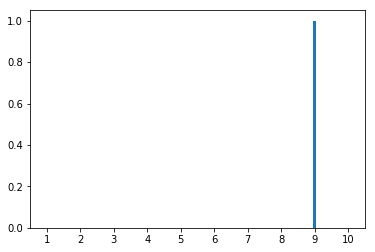

In [3]:
plot_dirichlet_samples(alpha=0.01, nb_samples=1)

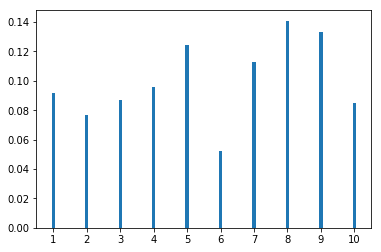

In [4]:
plot_dirichlet_samples(alpha=10, nb_samples=1)

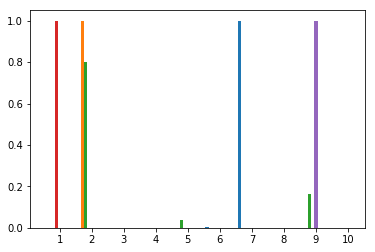

In [5]:
plot_dirichlet_samples(alpha=0.01, nb_samples=5)

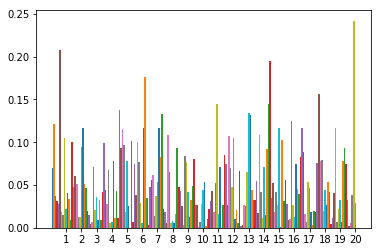

In [6]:
plot_dirichlet_samples(alpha=1, nb_samples=10, f_types=20)

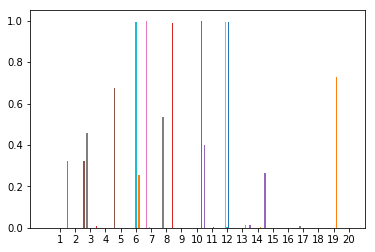

In [7]:
plot_dirichlet_samples(alpha=0.01, nb_samples=10, f_types=20)

In [10]:
def softmax(logits):
    log_normaliser = np.logaddexp.reduce(logits, axis=-1, keepdims=True)
    return np.exp(logits - log_normaliser)

In [21]:
softmax(np.random.normal(size=[10, 5]))

array([[ 0.42873962,  0.1775641 ,  0.0726917 ,  0.09099599,  0.23000858],
       [ 0.16661878,  0.10232741,  0.11472199,  0.32707348,  0.28925834],
       [ 0.29020615,  0.21114366,  0.0776771 ,  0.17570488,  0.24526821],
       [ 0.27007349,  0.25610594,  0.12320581,  0.11439127,  0.23622349],
       [ 0.11125371,  0.2759845 ,  0.05723778,  0.13169113,  0.42383289],
       [ 0.04353671,  0.44205487,  0.18226358,  0.22137651,  0.11076833],
       [ 0.15407979,  0.03160647,  0.59572651,  0.0671539 ,  0.15143333],
       [ 0.08160807,  0.46483216,  0.34001648,  0.07125876,  0.04228453],
       [ 0.06829952,  0.07460023,  0.0974218 ,  0.67653588,  0.08314257],
       [ 0.12280634,  0.25073382,  0.14495177,  0.40546403,  0.07604404]])

In [22]:
from scipy import special

In [63]:
def make_logistic_normal(alpha, version='kl'):
    """
    version:
        'kl' see https://en.wikipedia.org/wiki/Logit-normal_distribution#Relationship_with_the_Dirichlet_distribution
        'laplace' see Equation (6) https://arxiv.org/pdf/1703.01488.pdf
    """    
    if version == 'kl':        
        alpha0 = np.sum(alpha, axis=-1, keepdims=True)
        loc = special.digamma(alpha) - special.digamma(alpha0)
        scale = special.polygamma(1, alpha) + special.polygamma(1, alpha0)
    elif version == 'laplace':
        alpha0 = np.sum(alpha, axis=-1, keepdims=True)        
        loc = np.log(alpha) - np.mean(np.log(alpha), axis=-1)
        K = np.shape(alpha)[-1]
        scale = 1. / alpha * (1. - 2. / K) + 1. / (K * K) * np.sum(1. / alpha, axis=-1)
    else:
        raise ValueError('I do not know this approximation: %s' % version)
    return loc, scale

In [90]:
make_logistic_normal(np.full(5, 0.1), version='kl')

(array([-8.46024491, -8.46024491, -8.46024491, -8.46024491, -8.46024491]),
 array([ 106.36810135,  106.36810135,  106.36810135,  106.36810135,
         106.36810135]))

In [91]:
make_logistic_normal(np.full(5, 0.1), version='laplace')

(array([ 0.,  0.,  0.,  0.,  0.]), array([ 8.,  8.,  8.,  8.,  8.]))

In [92]:
loc, scale = make_logistic_normal(np.full(5, 0.1), version='kl')

In [93]:
loc

array([-8.46024491, -8.46024491, -8.46024491, -8.46024491, -8.46024491])

In [94]:
scale

array([ 106.36810135,  106.36810135,  106.36810135,  106.36810135,
        106.36810135])

In [95]:
softmax(np.random.normal(loc, scale, size=[10, 5]))

array([[  1.00000000e+000,   1.76733778e-022,   2.67164067e-023,
          2.13542073e-107,   1.54750963e-084],
       [  1.00000000e+000,   2.32815074e-027,   8.56651478e-113,
          7.56598432e-071,   8.02167202e-090],
       [  6.70960386e-047,   6.38504760e-041,   2.19807520e-044,
          1.00000000e+000,   6.84508779e-112],
       [  1.77177355e-096,   2.70836956e-010,   1.37674679e-100,
          3.58640266e-086,   1.00000000e+000],
       [  8.68943546e-083,   1.00000000e+000,   2.86823244e-067,
          4.85163782e-079,   1.66326069e-093],
       [  7.07696986e-007,   8.13979259e-031,   1.81646665e-049,
          9.99999292e-001,   3.00139300e-067],
       [  1.95976252e-049,   1.32119023e-066,   1.00000000e+000,
          8.65840609e-017,   2.14627528e-025],
       [  3.67278246e-062,   3.55135068e-080,   1.00000000e+000,
          3.43509280e-021,   1.53035032e-021],
       [  1.00000000e+000,   3.79703606e-090,   3.88094269e-061,
          5.79984069e-022,   2.79829418

In [96]:
def plot_approx_dir_samples(alpha=0.01, f_types=10, nb_samples=5, approx_type='kl'):
    f_support = np.arange(1, f_types + 1)
    alphas = np.full(f_types, alpha)
    loc, scale = make_logistic_normal(alphas, version=approx_type)
    cats = softmax(np.random.normal(loc, scale, size=[nb_samples, f_types]))
    #cats = np.random.dirichlet(alphas, size=nb_samples)
    for i, cat in enumerate(cats):
        plt.bar(f_support + (0.1 * i), cat, width=0.1, tick_label=f_support)

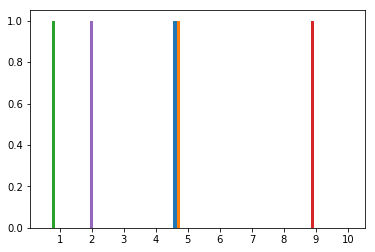

In [112]:
plot_approx_dir_samples(alpha=0.1, f_types=10, nb_samples=5, approx_type='kl')

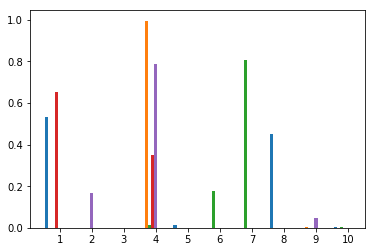

In [113]:
plot_approx_dir_samples(alpha=0.1, f_types=10, nb_samples=5, approx_type='laplace')

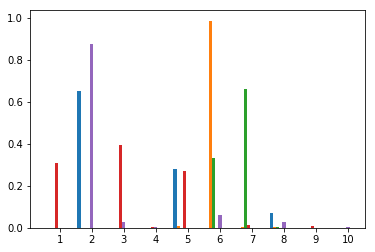

In [114]:
plot_dirichlet_samples(alpha=0.1, f_types=10, nb_samples=5)

In [130]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

def draw_pdf_contours(dist, nlevels=200, subdiv=8, **kwargs):
    import math
    
    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')
    
midpoints = [(corners[(i + 1) % 3] + corners[(i + 2) % 3]) / 2.0 \
             for i in range(3)]

def xy2bc(xy, tol=1.e-3):
    '''Converts 2D Cartesian coordinates to barycentric.'''
    s = [(corners[i] - midpoints[i]).dot(xy - midpoints[i]) / 0.75 \
         for i in range(3)]
    return np.clip(s, tol, 1.0 - tol)

In [141]:
class Dirichlet(object):
    def __init__(self, alpha):
        from math import gamma
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / \
                     np.multiply.reduce([gamma(a) for a in self._alpha])
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        return self._coef * np.multiply.reduce([xx ** (aa - 1)
                                         for (xx, aa)in zip(x, self._alpha)])
    

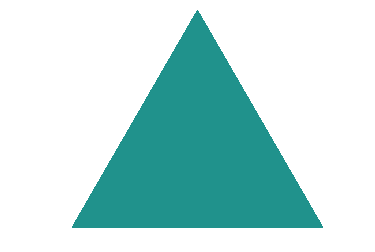

In [138]:
draw_pdf_contours(Dirichlet([1, 1, 1]))

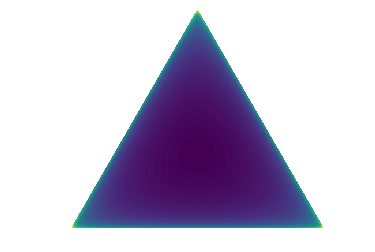

In [139]:
draw_pdf_contours(Dirichlet([0.999, 0.999, 0.999]))

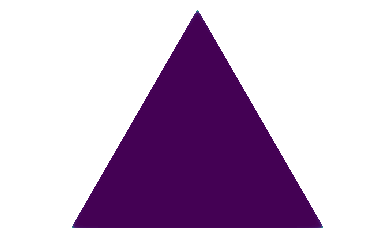

In [140]:
draw_pdf_contours(Dirichlet([0.1, 0.1, 0.1]))

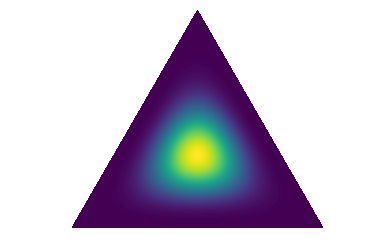

In [137]:
draw_pdf_contours(Dirichlet([5, 5, 5]))